In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import sys
import os
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import accuracy_score
from torchvision import transforms

# Ensure correct module paths
module_path = '/Users/nithinrajulapati/Downloads/PROJECT 1/src'
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the custom dataset and model
from custom_dataset import CustomDataset
from custom_model import MoCo, load_model

# File paths
geo_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/geography_aware_model.pth"
moco_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/moco_model.pth"
valid_csv_path = '/Users/nithinrajulapati/Downloads/PROJECT 1/output/valid_images.csv'


In [3]:
# Notebook Cell 2: Load Models
geo_model = load_model(geo_model_path, model_type='moco')
moco_model = load_model(moco_model_path, model_type='moco')


In [4]:
# Notebook Cell 3: Load Dataset
valid_dataset = CustomDataset(csv_file=valid_csv_path, root_dir='/Users/nithinrajulapati/Downloads/PROJECT 1/output/images')
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


Number of valid samples: 2783


Geography Aware Model Accuracy: 0.0
MoCo Model Accuracy: 0.013654329859863456

Geography Aware Model Classification Report:
               precision    recall  f1-score   support

         -53       0.00      0.00      0.00       1.0
         -51       0.00      0.00      0.00       3.0
         -49       0.00      0.00      0.00       3.0
         -45       0.00      0.00      0.00       2.0
         -44       0.00      0.00      0.00       6.0
         -43       0.00      0.00      0.00       8.0
         -42       0.00      0.00      0.00       1.0
         -41       0.00      0.00      0.00       1.0
         -37       0.00      0.00      0.00      11.0
         -36       0.00      0.00      0.00       7.0
         -35       0.00      0.00      0.00       1.0
         -34       0.00      0.00      0.00      27.0
         -33       0.00      0.00      0.00       1.0
         -32       0.00      0.00      0.00       3.0
         -29       0.00      0.00      0.00       1.0
         -

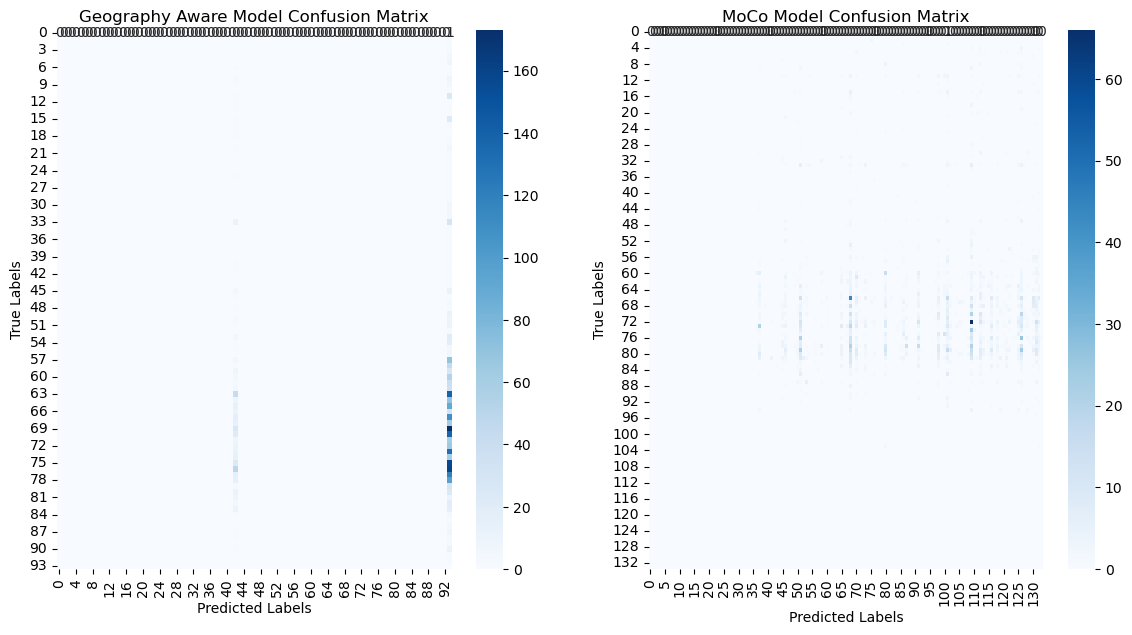

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Evaluate Models with additional metrics
def evaluate_model(model, dataloader):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model.encoder_q(inputs)
            _, preds = torch.max(outputs, 1)  # Convert model outputs to class labels
            all_preds.extend(preds.cpu().numpy().tolist())
            if isinstance(labels, torch.Tensor):
                labels = labels.cpu().numpy().tolist()
            if isinstance(labels[0], list):
                labels = [label[0] for label in labels]  # Extract the single value from the list
            all_labels.extend(labels)
    
    # Convert predictions and labels to integer lists
    all_preds = [int(pred) for pred in all_preds]
    all_labels = [int(label) for label in all_labels]

    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)
    
    return accuracy, report, cm

# Evaluate Models
geo_model_accuracy, geo_model_report, geo_model_cm = evaluate_model(geo_model, valid_dataloader)
moco_model_accuracy, moco_model_report, moco_model_cm = evaluate_model(moco_model, valid_dataloader)

print(f"Geography Aware Model Accuracy: {geo_model_accuracy}")
print(f"MoCo Model Accuracy: {moco_model_accuracy}")

print("\nGeography Aware Model Classification Report:\n", geo_model_report)
print("\nMoCo Model Classification Report:\n", moco_model_report)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.heatmap(geo_model_cm, annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title('Geography Aware Model Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(moco_model_cm, annot=True, fmt="d", ax=axes[1], cmap="Blues")
axes[1].set_title('MoCo Model Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()


Number of valid samples: 2783
Outputs shape: torch.Size([32, 2]), Labels shape: torch.Size([32, 2])
Outputs: tensor([[ 0.8086, -0.4332],
        [ 1.1350, -0.5015],
        [ 1.0797, -0.4116],
        [ 1.1284, -0.4313],
        [ 0.6328, -0.3536],
        [ 0.9473, -0.4624],
        [ 0.9345, -0.2987],
        [ 0.9027, -0.4760],
        [ 0.8733, -0.4225],
        [ 0.6850, -0.3201],
        [ 0.7587, -0.3073],
        [ 0.9357, -0.2738],
        [ 1.8507, -0.7981],
        [ 0.7594, -0.3912],
        [ 1.1208, -0.4677],
        [ 0.8232, -0.3747],
        [ 0.7180, -0.2582],
        [ 0.9258, -0.3174],
        [ 0.6349, -0.2724],
        [ 0.3918, -0.2405],
        [ 1.1460, -0.5972],
        [ 0.6686, -0.2400],
        [ 0.5453, -0.3250],
        [ 0.5336, -0.2101],
        [ 0.7591, -0.3603],
        [ 0.5860, -0.3201],
        [ 0.7592, -0.3435],
        [ 0.9066, -0.3633],
        [ 0.8823, -0.4321],
        [ 0.8553, -0.3627],
        [ 0.8214, -0.3714],
        [ 1.2453, -0.54

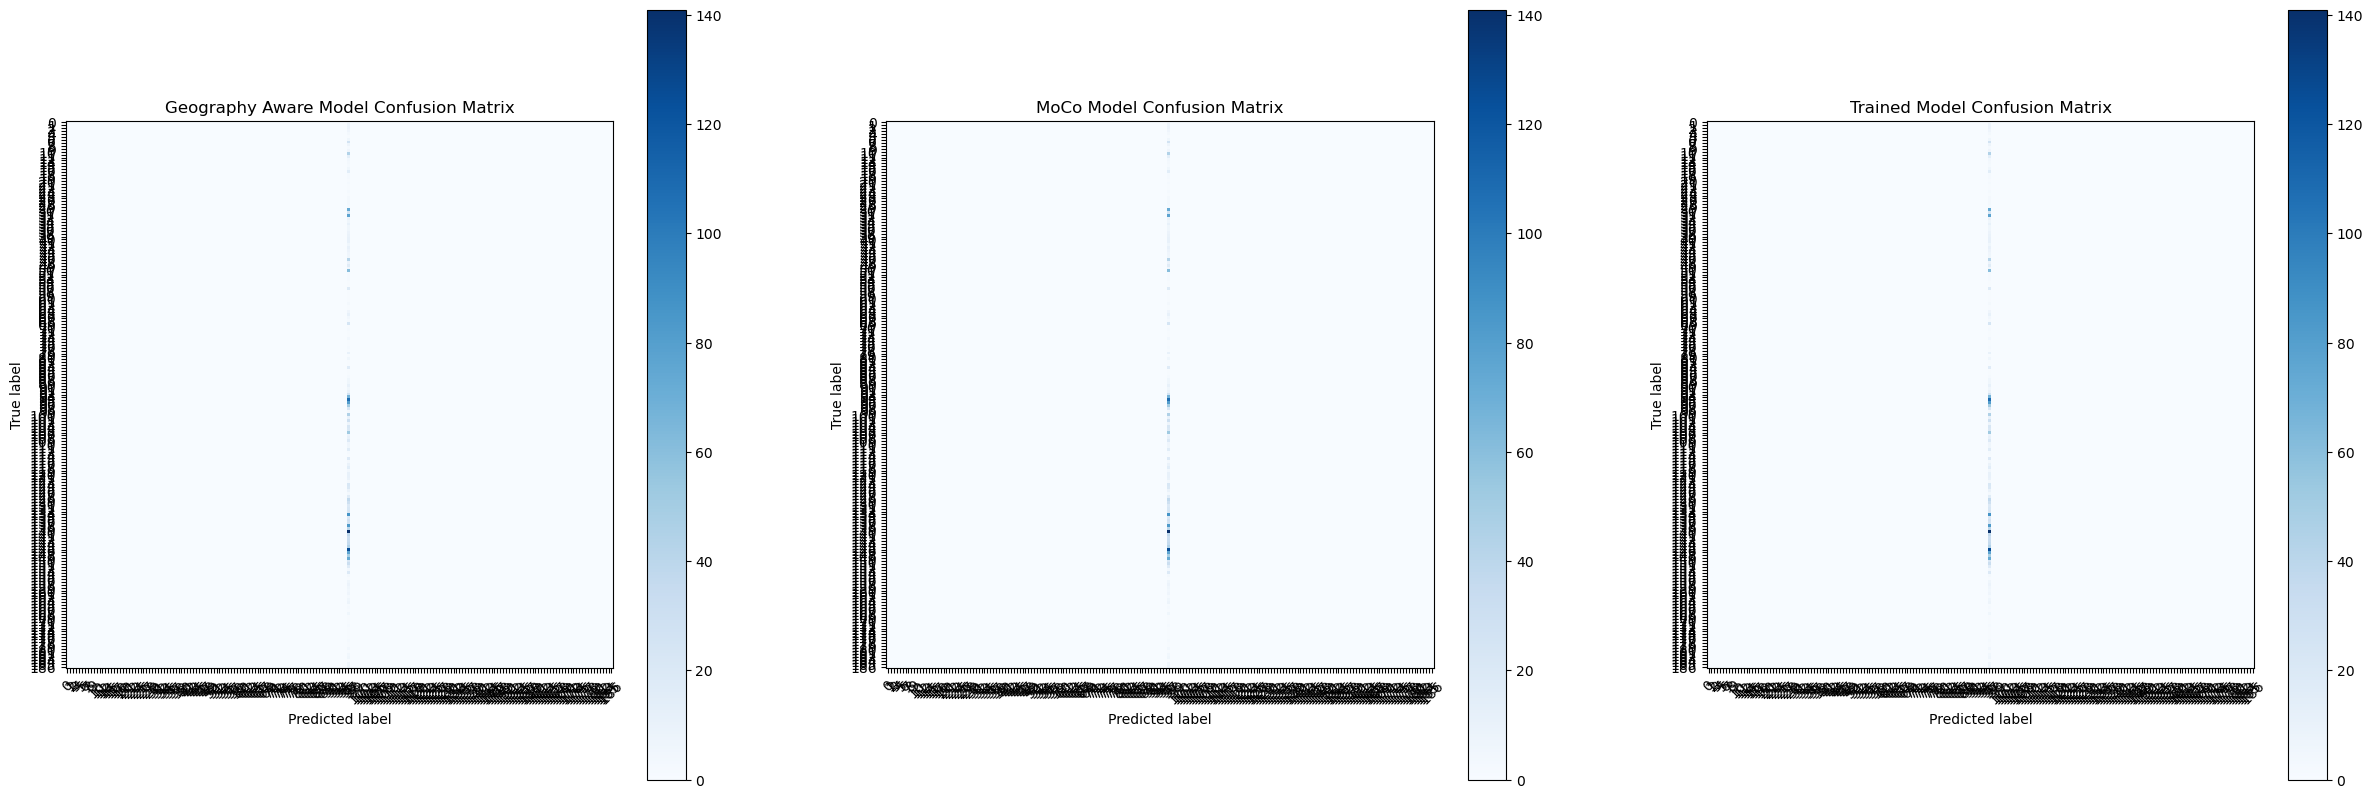

In [31]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from custom_dataset import CustomDataset
from custom_model import MoCo, load_model
import numpy as np

# File paths
geo_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/geography_aware_model.pth"
moco_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/moco_model.pth"
trained_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/trained_model.pth"
valid_csv_path = '/Users/nithinrajulapati/Downloads/PROJECT 1/output/valid_images.csv'
image_root_dir = '/Users/nithinrajulapati/Downloads/PROJECT 1/output/images'

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load models
geo_model = load_model(geo_model_path, model_type='custom')
moco_model = load_model(moco_model_path, model_type='custom')
trained_model = load_model(trained_model_path, model_type='custom')

# Load dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
valid_dataset = CustomDataset(csv_file=valid_csv_path, root_dir=image_root_dir, transform=transform)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)

# Function to evaluate model
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # Forward pass with single input
            _, preds = torch.max(outputs, 1)  # Convert model output to class predictions
            
            # Debugging prints
            print(f"Outputs shape: {outputs.shape}, Labels shape: {labels.shape}")
            print(f"Outputs: {outputs}, Labels: {labels}")

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Ensure labels are in the correct format
    all_preds = np.array(all_preds).flatten()
    all_labels = np.array(all_labels).flatten()

    # Debugging lengths
    print(f"Length of all_preds: {len(all_preds)}, Length of all_labels: {len(all_labels)}")

    if len(all_preds) != len(all_labels):
        min_length = min(len(all_preds), len(all_labels))
        all_preds = all_preds[:min_length]
        all_labels = all_labels[:min_length]

    # Ensure all_preds and all_labels are of type int
    all_preds = all_preds.astype(int)
    all_labels = all_labels.astype(int)

    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, report, cm, all_labels, all_preds

# Evaluate models
geo_model_accuracy, geo_model_report, geo_model_cm, geo_all_labels, geo_all_preds = evaluate_model(geo_model, valid_dataloader)
moco_model_accuracy, moco_model_report, moco_model_cm, moco_all_labels, moco_all_preds = evaluate_model(moco_model, valid_dataloader)
trained_model_accuracy, trained_model_report, trained_model_cm, trained_all_labels, trained_all_preds = evaluate_model(trained_model, valid_dataloader)

# Print results
print(f"Geography Aware Model Accuracy: {geo_model_accuracy}")
print(f"Geography Aware Model Classification Report:\n{geo_model_report}")
print(f"MoCo Model Accuracy: {moco_model_accuracy}")
print(f"MoCo Model Classification Report:\n{moco_model_report}")
print(f"Trained Model Accuracy: {trained_model_accuracy}")
print(f"Trained Model Classification Report:\n{trained_model_report}")

# Plot confusion matrices
def plot_confusion_matrix(cm, all_labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(set(all_labels)))
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plot_confusion_matrix(geo_model_cm, geo_all_labels, title='Geography Aware Model Confusion Matrix')

plt.subplot(1, 3, 2)
plot_confusion_matrix(moco_model_cm, moco_all_labels, title='MoCo Model Confusion Matrix')

plt.subplot(1, 3, 3)
plot_confusion_matrix(trained_model_cm, trained_all_labels, title='Trained Model Confusion Matrix')

plt.show()


Length of all_preds: 2783, Length of all_labels: 2783
Linear Regression Model Mean Squared Error: 257.1169428316336
Linear Regression Model R-squared: 0.3100947584137155


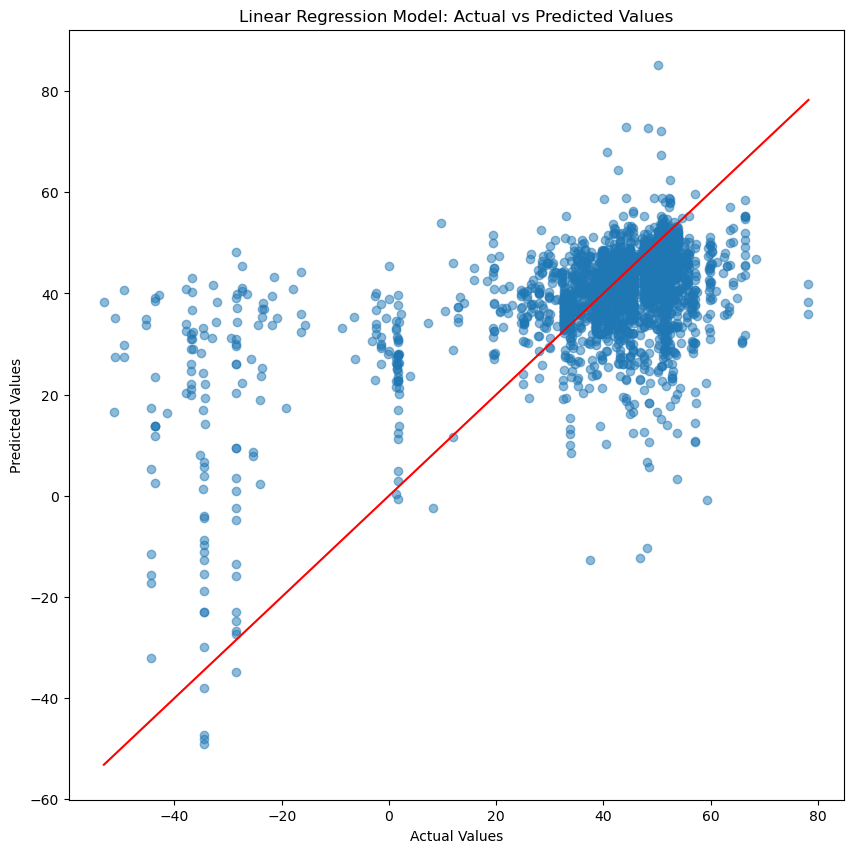

In [35]:
# Linear_Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate model using a regression algorithm (Linear Regression in this example)
def evaluate_linear_regression_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    lr_model = LinearRegression()
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # Forward pass with single input
            features = outputs.cpu().numpy()
            
            # Using the first column of labels (assuming it's either latitude or longitude)
            labels_np = labels.cpu().numpy()[:, 0]
            
            # Fit Linear Regression model on the features
            lr_model.fit(features, labels_np)
            
            # Predict with Linear Regression model
            preds = lr_model.predict(features)
            
            all_preds.extend(preds)
            all_labels.extend(labels_np)

    # Convert lists to numpy arrays
    all_preds = np.array(all_preds).flatten()
    all_labels = np.array(all_labels).flatten()

    # Debugging lengths
    print(f"Length of all_preds: {len(all_preds)}, Length of all_labels: {len(all_labels)}")

    if len(all_preds) != len(all_labels):
        min_length = min(len(all_preds), len(all_labels))
        all_preds = all_preds[:min_length]
        all_labels = all_labels[:min_length]

    # Compute evaluation metrics
    mse = mean_squared_error(all_labels, all_preds)
    r2 = r2_score(all_labels, all_preds)
    return mse, r2, all_labels, all_preds

# Evaluate new model
linear_regression_mse, linear_regression_r2, lr_all_labels, lr_all_preds = evaluate_linear_regression_model(trained_model, valid_dataloader)

# Print results for Linear Regression model
print(f"Linear Regression Model Mean Squared Error: {linear_regression_mse}")
print(f"Linear Regression Model R-squared: {linear_regression_r2}")

# Plotting actual vs predicted values for Linear Regression model
plt.figure(figsize=(10, 10))
plt.scatter(lr_all_labels, lr_all_preds, alpha=0.5)
plt.plot([min(lr_all_labels), max(lr_all_labels)], [min(lr_all_labels), max(lr_all_labels)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs Predicted Values')
plt.show()


Length of all_preds: 2783, Length of all_labels: 2783
Random Forest Regressor Model Mean Squared Error: 320.385733521259
Random Forest Regressor Model R-squared: 0.852046055864505


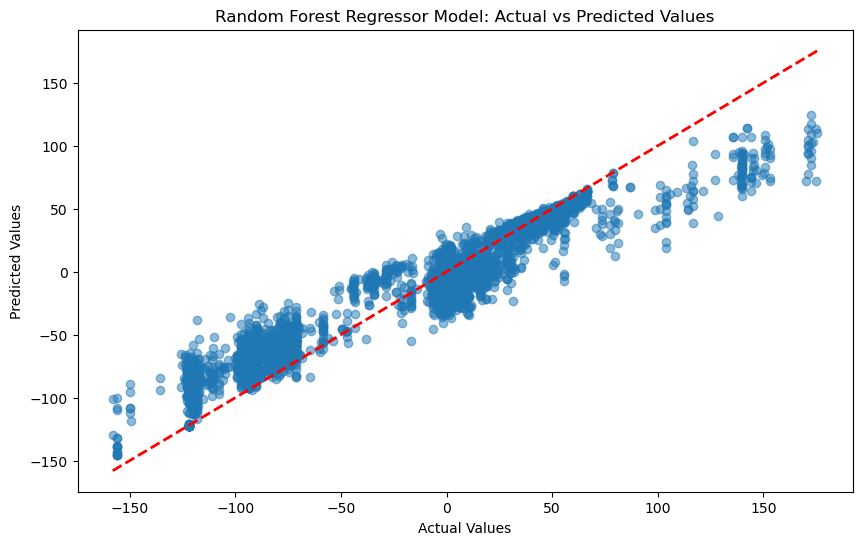

In [36]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_random_forest_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    print(f"Length of all_preds: {len(all_preds)}, Length of all_labels: {len(all_labels)}")

    if len(all_preds) != len(all_labels):
        min_length = min(len(all_preds), len(all_labels))
        all_preds = all_preds[:min_length]
        all_labels = all_labels[:min_length]

    # Train Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(all_preds, all_labels)

    rf_predictions = rf_regressor.predict(all_preds)

    mse = mean_squared_error(all_labels, rf_predictions)
    r2 = r2_score(all_labels, rf_predictions)

    return mse, r2, all_labels, rf_predictions

# Evaluate the trained model with Random Forest Regressor
rf_mse, rf_r2, rf_all_labels, rf_predictions = evaluate_random_forest_model(trained_model, valid_dataloader)

print(f"Random Forest Regressor Model Mean Squared Error: {rf_mse}")
print(f"Random Forest Regressor Model R-squared: {rf_r2}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(rf_all_labels, rf_predictions, alpha=0.5)
plt.plot([rf_all_labels.min(), rf_all_labels.max()], [rf_all_labels.min(), rf_all_labels.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Model: Actual vs Predicted Values')
plt.show()


In [53]:
# Gathering predictions from models

geo_model.eval()
moco_model.eval()
trained_model.eval()

all_geo_preds = []
all_moco_preds = []
all_trained_preds = []

all_labels = []

with torch.no_grad():
    for inputs, labels in valid_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Geography Aware Model
        geo_outputs, _ = geo_model(inputs, inputs) if isinstance(geo_model, MoCo) else (geo_model(inputs), None)
        _, geo_preds = torch.max(geo_outputs, 1)

        # MoCo Model
        moco_outputs, _ = moco_model(inputs, inputs) if isinstance(moco_model, MoCo) else (moco_model(inputs), None)
        _, moco_preds = torch.max(moco_outputs, 1)

        # Trained Model
        trained_outputs = trained_model(inputs)
        _, trained_preds = torch.max(trained_outputs, 1)

        all_geo_preds.extend(geo_preds.cpu().numpy())
        all_moco_preds.extend(moco_preds.cpu().numpy())
        all_trained_preds.extend(trained_preds.cpu().numpy())

        all_labels.extend(labels.cpu().numpy())

all_geo_preds = np.array(all_geo_preds).flatten()
all_moco_preds = np.array(all_moco_preds).flatten()
all_trained_preds = np.array(all_trained_preds).flatten()
all_labels = np.array(all_labels).flatten()

# Ensuring all arrays have the same length
min_length = min(len(all_geo_preds), len(all_moco_preds), len(all_trained_preds), len(all_labels))

all_geo_preds = all_geo_preds[:min_length]
all_moco_preds = all_moco_preds[:min_length]
all_trained_preds = all_trained_preds[:min_length]
all_labels = all_labels[:min_length]

print(f"Length of all_geo_preds: {len(all_geo_preds)}, Length of all_moco_preds: {len(all_moco_preds)}, Length of all_trained_preds: {len(all_trained_preds)}, Length of all_labels: {len(all_labels)}")


Length of all_geo_preds: 2783, Length of all_moco_preds: 2783, Length of all_trained_preds: 2783, Length of all_labels: 2783


Ensemble Model Mean Squared Error: 3471.513248509107
Ensemble Model R-squared: -5.657114980905931e-06


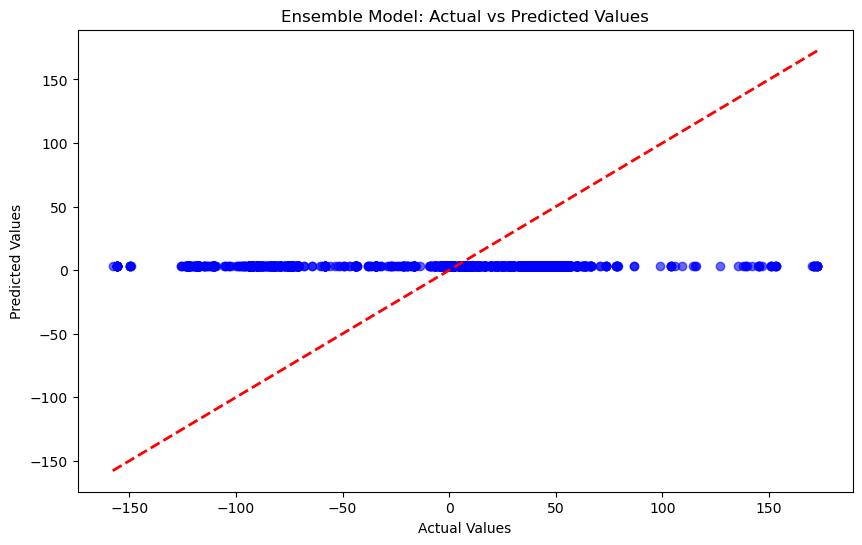

In [54]:
# Ensemble methods

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the datasets
X = np.vstack((all_geo_preds, all_moco_preds, all_trained_preds)).T  # Features
y = np.array(all_labels).reshape(-1, 1)  # Targets

# Initialize models for ensemble
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Create ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('lr', lin_reg), 
    ('rf', rf_reg)
])

# Fit ensemble model
ensemble_model.fit(X, y.ravel())

# Make predictions with ensemble model
ensemble_preds = ensemble_model.predict(X)

# Calculate metrics for ensemble model
ensemble_mse = mean_squared_error(y, ensemble_preds)
ensemble_r2 = r2_score(y, ensemble_preds)

print(f"Ensemble Model Mean Squared Error: {ensemble_mse}")
print(f"Ensemble Model R-squared: {ensemble_r2}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, ensemble_preds, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ensemble Model: Actual vs Predicted Values')
plt.show()


Number of valid samples: 2783
Geo features shape: (2783, 2)
Geo labels shape: (2783, 2)
Geo features shape after alignment: (2783, 2)
Geo labels shape after alignment: (2783,)
Random Forest Regressor Model Mean Squared Error: 54.4717839182636
Random Forest Regressor Model R-squared: 0.8538393898515896


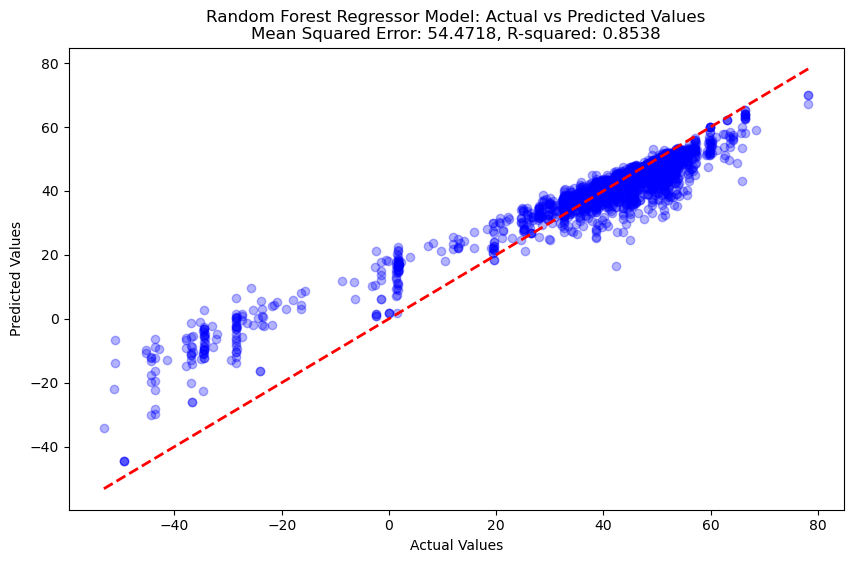

In [60]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from custom_dataset import CustomDataset
from custom_model import MoCo, load_model
import numpy as np

# File paths
geo_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/geography_aware_model.pth"
moco_model_path = "/Users/nithinrajulapati/Downloads/PROJECT 1/output/moco_model.pth"
valid_csv_path = '/Users/nithinrajulapati/Downloads/PROJECT 1/output/valid_images.csv'
image_root_dir = '/Users/nithinrajulapati/Downloads/PROJECT 1/output/images'

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load models
geo_model = load_model(geo_model_path, model_type='custom')
moco_model = load_model(moco_model_path, model_type='custom')

# Load dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
valid_dataset = CustomDataset(csv_file=valid_csv_path, root_dir=image_root_dir, transform=transform)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)

# Extract features using the MoCo model
def extract_features(model, dataloader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, label in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())
            labels.append(label.cpu().numpy())
    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels

# Extract features from validation set
geo_features, geo_labels = extract_features(geo_model, valid_dataloader)

# Debugging prints
print(f"Geo features shape: {geo_features.shape}")
print(f"Geo labels shape: {geo_labels.shape}")

# Ensure consistent lengths of features and labels
if geo_features.shape[0] != geo_labels.shape[0]:
    min_length = min(geo_features.shape[0], geo_labels.shape[0])
    geo_features = geo_features[:min_length]
    geo_labels = geo_labels[:min_length]

# Select one dimension from the labels if they are multi-dimensional
geo_labels = geo_labels[:, 0]

# Debugging prints
print(f"Geo features shape after alignment: {geo_features.shape}")
print(f"Geo labels shape after alignment: {geo_labels.shape}")

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(geo_features, geo_labels)

# Predict and evaluate
preds = rf_model.predict(geo_features)
mse = mean_squared_error(geo_labels, preds)
r2 = r2_score(geo_labels, preds)

print(f"Random Forest Regressor Model Mean Squared Error: {mse}")
print(f"Random Forest Regressor Model R-squared: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(geo_labels, preds, alpha=0.3, color='b')
plt.plot([geo_labels.min(), geo_labels.max()], [geo_labels.min(), geo_labels.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f"Random Forest Regressor Model: Actual vs Predicted Values\nMean Squared Error: {mse:.4f}, R-squared: {r2:.4f}")
plt.show()
